In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("/Users/wangyining/Documents/employment status/Unemployment_exported.xlsx")
df

,Unnamed: 0,Postal Abbr.,State,Year,Civilian_labor_force,Employed,Unemployed,Unemployment_rate
0,0,AL,Alabama,2013,2172102,2012828,159274,7.3
1,1,AL,Alabama,2014,2164715,2018705,146010,6.7
2,2,AL,Alabama,2015,2152295,2020443,131852,6.1
3,3,AL,Alabama,2016,2155729,2029157,126572,5.9
4,4,AL,Alabama,2017,2203458,2103873,99585,4.5
...,...,...,...,...,...,...,...,...
352,352,WY,Wyoming,2015,301608,288894,12714,4.2
353,353,WY,Wyoming,2016,300546,284439,16107,5.4
354,354,WY,Wyoming,2017,293802,281164,12638,4.3
355,355,WY,Wyoming,2018,292629,280754,11875,4.1


In [2]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,Postal Abbr.,State,Year,Civilian_labor_force,Employed,Unemployed,Unemployment_rate
0,AL,Alabama,2013,2172102,2012828,159274,7.3
1,AL,Alabama,2014,2164715,2018705,146010,6.7
2,AL,Alabama,2015,2152295,2020443,131852,6.1
3,AL,Alabama,2016,2155729,2029157,126572,5.9
4,AL,Alabama,2017,2203458,2103873,99585,4.5
...,...,...,...,...,...,...,...
352,WY,Wyoming,2015,301608,288894,12714,4.2
353,WY,Wyoming,2016,300546,284439,16107,5.4
354,WY,Wyoming,2017,293802,281164,12638,4.3
355,WY,Wyoming,2018,292629,280754,11875,4.1


In [3]:
# computing number of rows
rows = len(df.axes[0])
# computing number of columns
cols = len(df.axes[1])
# computing the size of the dataframe
values = df.size
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)
print("Number of values: ", values)

Number of Rows:  357
Number of Columns:  7
Number of values:  2499


In [4]:
state=df['State'].unique()
print(state)
print(len(state))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
51


In [5]:
list(df.columns)

['Postal Abbr.',
 'State',
 'Year',
 'Civilian_labor_force',
 'Employed',
 'Unemployed',
 'Unemployment_rate']

In [6]:
#Unemployment rate during 2013-2019 by State

df1=df.pivot_table(index='State',columns='Year',values='Unemployment_rate')
print("Unemployment rate throughtout the years")
df1.head(5)

Unemployment rate throughtout the years


Year,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,
Alabama,7.3,6.7,6.1,5.9,4.5,3.9,3.2
Alaska,7.0,6.7,6.3,6.6,6.5,6.0,5.6
Arizona,7.8,6.8,6.1,5.5,5.0,4.8,4.8
Arkansas,7.1,5.9,5.0,4.0,3.7,3.7,3.5
California,9.0,7.6,6.3,5.5,4.8,4.2,4.1


In [7]:
df1=df1.mean(axis=1).to_frame()
df1=df1.rename(columns={0: "Average unemployment rate"})
df1=df1.sort_values('Average unemployment rate',ascending=False).head(8)
df1

,Average unemployment rate
State,
District of Columbia,6.642857
Alaska,6.385714
Nevada,6.328571
Mississippi,6.300000
New Mexico,6.114286
California,5.928571
Illinois,5.928571
West Virginia,5.885714


In [8]:
#Which states/District have the highest average unemployment rate during 2013-2019?
df2=df.groupby(['State']).Unemployment_rate.agg(['mean'])
df2=df2.sort_values(by=['mean'],ascending=False,inplace=False)


print("States/Districts with the highest unemployment rate")
print("Sorted by average rate during 2013-2019")

df2.head()

States/Districts with the highest unemployment rate
Sorted by average rate during 2013-2019


,mean
State,
District of Columbia,6.642857
Alaska,6.385714
Nevada,6.328571
Mississippi,6.300000
New Mexico,6.114286


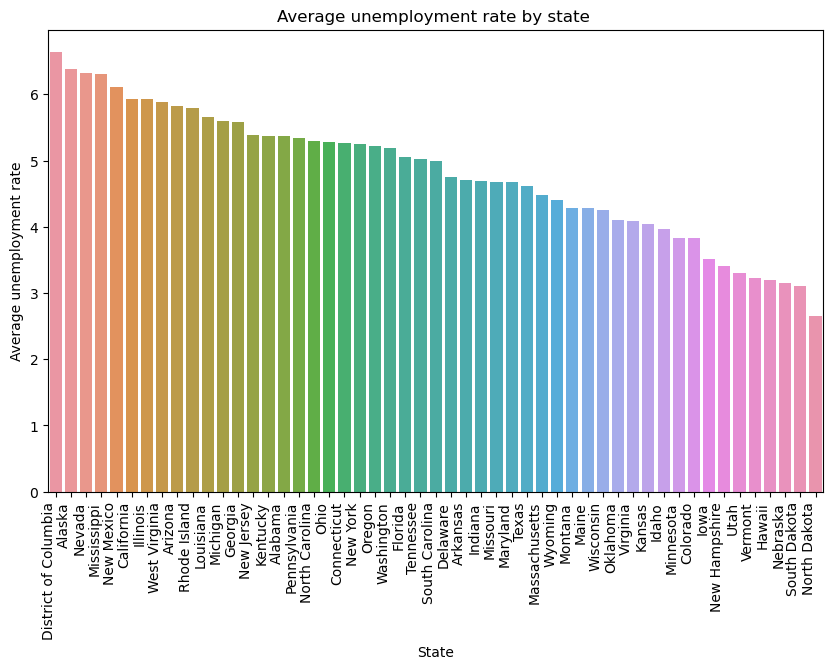

<Figure size 640x480 with 0 Axes>

In [9]:
# Perform a basic data analysis using Matplotlib and Seaborn
graph_df2=df2.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="State", y="mean", data=graph_df2)
plt.title("Average unemployment rate by state ")
plt.xlabel("State")
plt.ylabel("Average unemployment rate")
ax=plt.gca()
plt.xticks(rotation=90, ha='right')
plt.show()
plt.savefig("average_rate.png")

In [10]:
#For each year, What is the sum,maximum,minimum,avergae of the unemployment population in different states of the US?

print("Uunemployment population(across states)")
df.groupby(['Year']).Unemployed.agg(['sum','median','max','min'])

Uunemployment population(across states)


,sum,median,max,min
Year,,,,
2013,11457241,149276.0,1677544,11590
2014,9617207,128967.0,1412174,10720
2015,8285731,106299.0,1176732,11468
2016,7725602,96696.0,1046610,10808
2017,7000411,84878.0,927302,10687
2018,6311939,83561.0,819595,8790
2019,6009990,72498.0,795311,7490


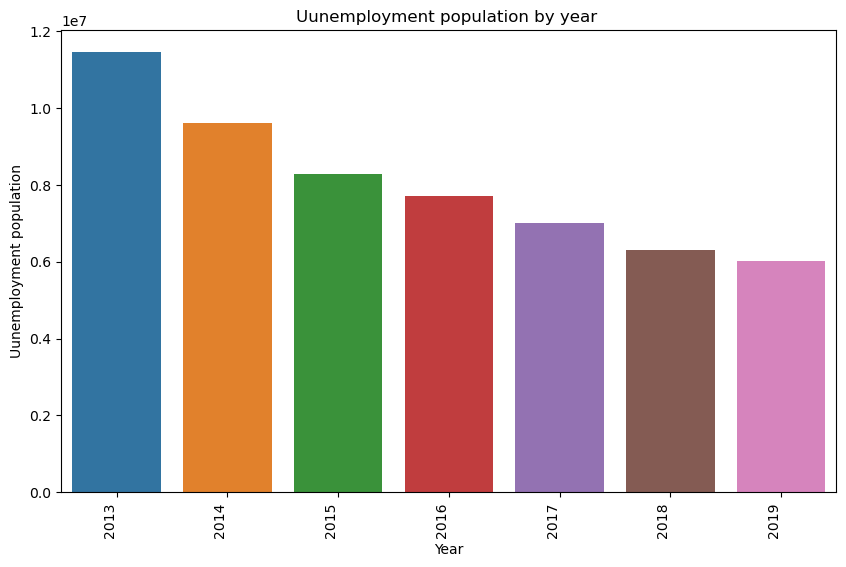

<Figure size 640x480 with 0 Axes>

In [11]:
graph_df=df.groupby(['Year']).Unemployed.agg(['sum'])
graph_df=graph_df.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Year", y="sum", data=graph_df)
plt.title("Uunemployment population by year ")
plt.xlabel("Year")
plt.ylabel("Uunemployment population")
ax=plt.gca()
plt.xticks(rotation=90, ha='right')
plt.show()
plt.savefig("unemployment_sum.png")


In [12]:
#Which state has the most Civilian labor force throughout the years?
df3=df.pivot_table(index='State',columns='Year',values='Civilian_labor_force')

df3.head(5)

Year,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,
Alabama,2172102,2164715,2152295,2155729,2203458,2240109,2272935
Alaska,363544,364281,362425,362017,360589,355499,353161
Arizona,3064554,3118441,3184445,3253468,3240111,3325721,3430766
Arkansas,1331609,1327959,1339301,1343891,1348088,1343862,1354936
California,18565408,18676692,18824141,19012017,19185366,19289505,19413244


In [13]:
print("The state with the most Civilian labor force:")
df3.idxmax(axis='rows')

The state with the most Civilian labor force:


Year
2013    California
2014    California
2015    California
2016    California
2017    California
2018    California
2019    California
dtype: object

In [14]:
print("Number of the Civilian labor force in California:")
df3.max(axis='rows')

Number of the Civilian labor force in California:


Year
2013    18565408
2014    18676692
2015    18824141
2016    19012017
2017    19185366
2018    19289505
2019    19413244
dtype: int64